In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
from PIL import Image 
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (30.0, 30.0)

In [2]:
dataDir='data/train/images'
annFile='xview_damage_assessment_instance_segmentation_dataset_train.json'

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.50s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
no-damage minor-damage major-damage destroyed

COCO supercategories: 
building


In [5]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=["no-damage", "minor-damage", "major-damage", "destroyed"]);
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds)-1)])[0]

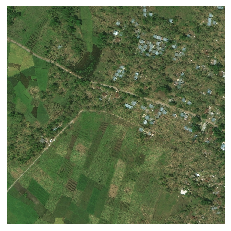

In [6]:
# load and display image
I = io.imread('%s/%s'%(dataDir,img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

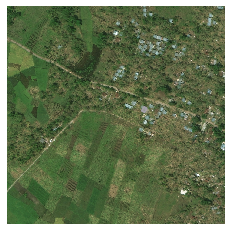

In [7]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=[3], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

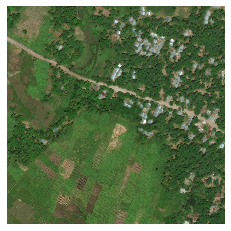

In [8]:
# load and show the "pre" image
I = io.imread('%s/%s'%(dataDir,img['file_name'].replace("post", "pre")))
plt.axis('off')
plt.imshow(I)
plt.show()